In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
df = pd.read_excel("/content/Copper_Set.xlsx")

In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
(df['selling_price']<0).value_counts()

False    181668
True          5
Name: selling_price, dtype: int64

In [ ]:
#pd.set_option('display.max_rows',None)

In [ ]:
#pd.reset_option("all")

In [ ]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.shape

(181673, 14)

In [ ]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
#1.Handling missing data
#2.Detecting and treating outliers/skewness
#3.Normalizing data
#4.Feature Selection

In [ ]:
#handling missing data
#step-1 drop duplicates
df = df.drop_duplicates()

In [ ]:
df.shape

(181673, 14)

In [ ]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [ ]:
#step2 - convert the datatype and round off the columns

In [ ]:
df['item_date'] = pd.to_datetime(df["item_date"]).dt.date
df['delivery date'] = pd.to_datetime(df["delivery date"]).dt.date

In [ ]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,1970-01-01,1047.0


In [ ]:
#converting cartain columns to numeric as to fill the missing values using mean median mode(is used when the majority of datatype in the dataset is float,int)
columns_to_numeric = ["quantity tons","customer","country","application","thickness","selling_price"]
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric,errors = "coerce")

In [ ]:
#removing rubbish values in material_ref column
#df['material_ref'] = df['material_ref'].apply(lambda x: None if str(x).startswith('00000') else x)
df.loc[df['material_ref'].str.startswith('000',na = False), 'material_ref'] = np.nan

In [ ]:
#df['quantity tons'] = round(df['quantity tons'])
#df['selling_price'] = round(df['selling_price'])

In [ ]:
#replace the negative values of quanity tons with NAN
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['thickness'] = df['thickness'].apply(lambda x: np.nan if x<=0 else x)

In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,1970-01-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,1970-01-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,1970-01-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,1970-01-01,601.00


In [ ]:
#step 3  - drop unwanted columns
df = df.drop(['id'],axis = 1)

In [ ]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.0
1,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,NaN,1668701718,1970-01-01,1047.0


In [ ]:
#step-4 Fill the columns using mean,median and mode
#Filling missing data with a mean or median value is applicable when the columns involved have integer or float data types.
#mode is also applicable to integers or floats. But it's handier when the columns in question contain strings.

In [ ]:
#filling the numeric data type columns with median
df['quantity tons'].fillna(df['quantity tons'].median(),inplace = True)
df['customer'].fillna(df['customer'].median(),inplace = True)
df['country'].fillna(df['country'].median(),inplace = True)
df['application'].fillna(df['application'].median(),inplace = True)
df['thickness'].fillna(df['thickness'].median(),inplace = True)
df['selling_price'].fillna(df['selling_price'].median(),inplace = True)

In [ ]:
#filling object datatype,datetime datatype columns using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace = True)
df['status'].fillna(df['status'].mode().iloc[0],inplace = True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace = True)
df['item type'].fillna(df['item type'].mode().iloc[0],inplace = True)
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace = True)
df['material_ref'].fillna(df['material_ref'].mode().iloc[0],inplace = True)
df['material_ref'].fillna(df['material_ref'].mode().iloc[0],inplace = True)


In [ ]:
df.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
#EDA - Exploratory Data Analysis
#detecting and treating outliers/skewness

In [ ]:
#detecting outlier using box plot

In [ ]:
df.skew()

<ipython-input-35-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


quantity tons    424.690816
customer          86.985308
country            0.753835
application        0.724564
thickness        303.447571
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [ ]:
#Here are some guidelines for interpreting skewness values:

#Skewness value close to 0: The distribution is approximately symmetrical.
#Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
#Skewness value less than -1 or greater than 1: The distribution is highly skewed.

In [ ]:
#Correcting skewness using log transformation method
#from the above plots quantity tons,thickness and selling_price looks skewed
df1 = df.copy()


In [ ]:
copper_cat = df1.select_dtypes(object)

In [ ]:
copper_num = df1.select_dtypes(["int64","float64"])

In [ ]:
copper_num

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00
181671,30.365013,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00


In [ ]:
#to get skewness values
copper_num.skew()

quantity tons    424.690816
customer          86.985308
country            0.753835
application        0.724564
thickness        303.447571
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


quantity tons
424.68730994731504


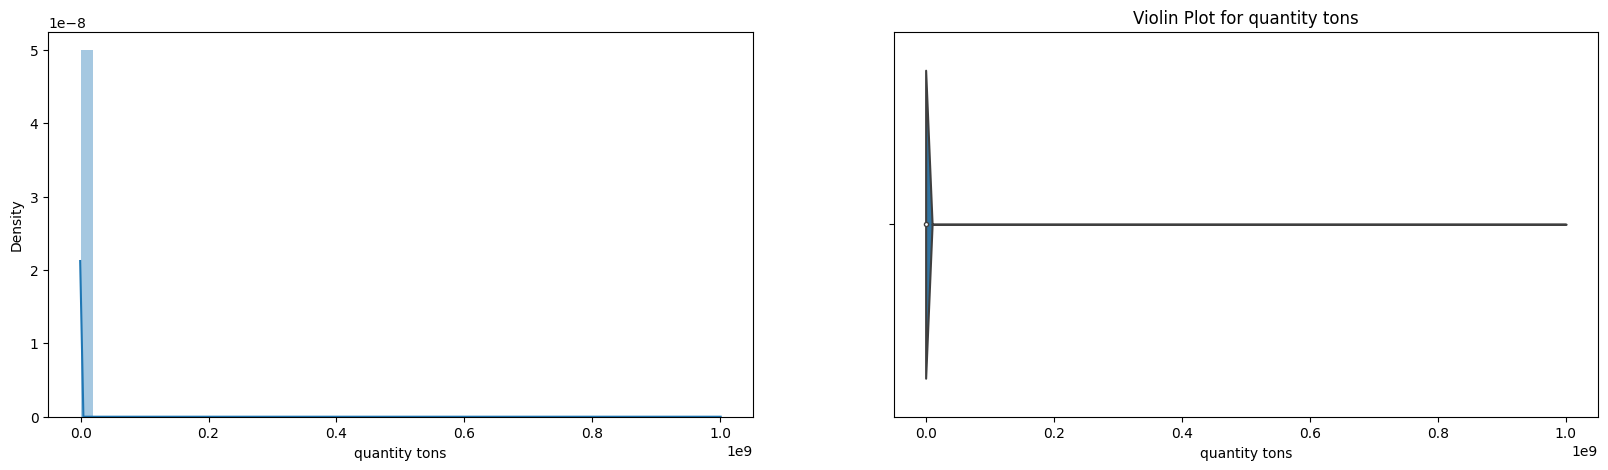

customer
86.9845901502091


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


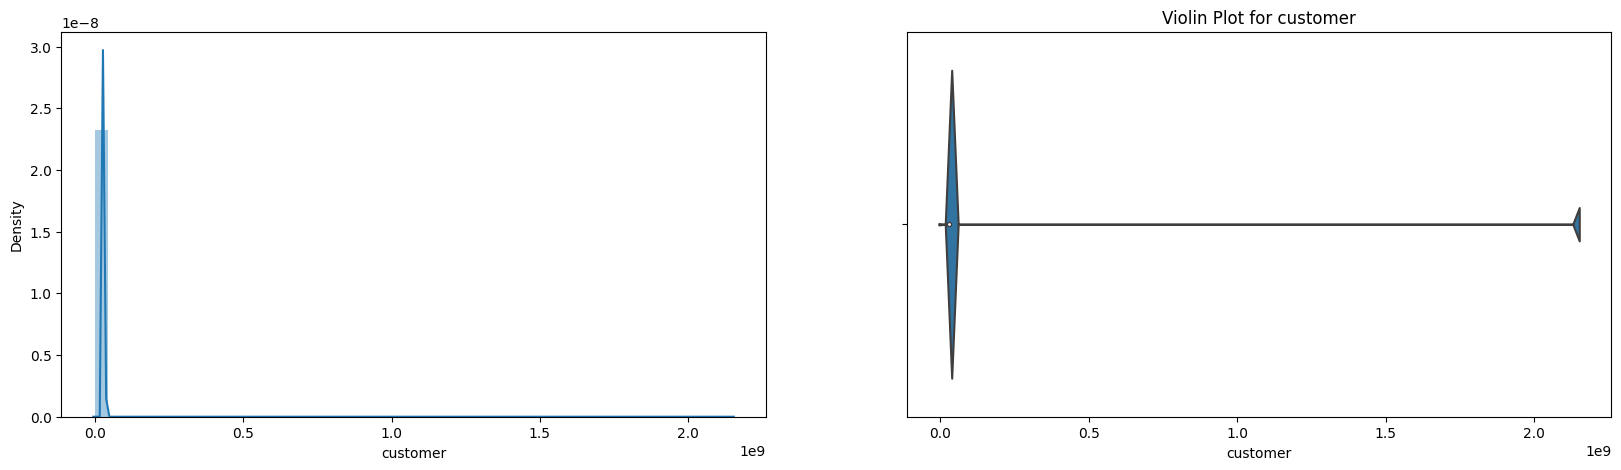

country
0.7538286488466676


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


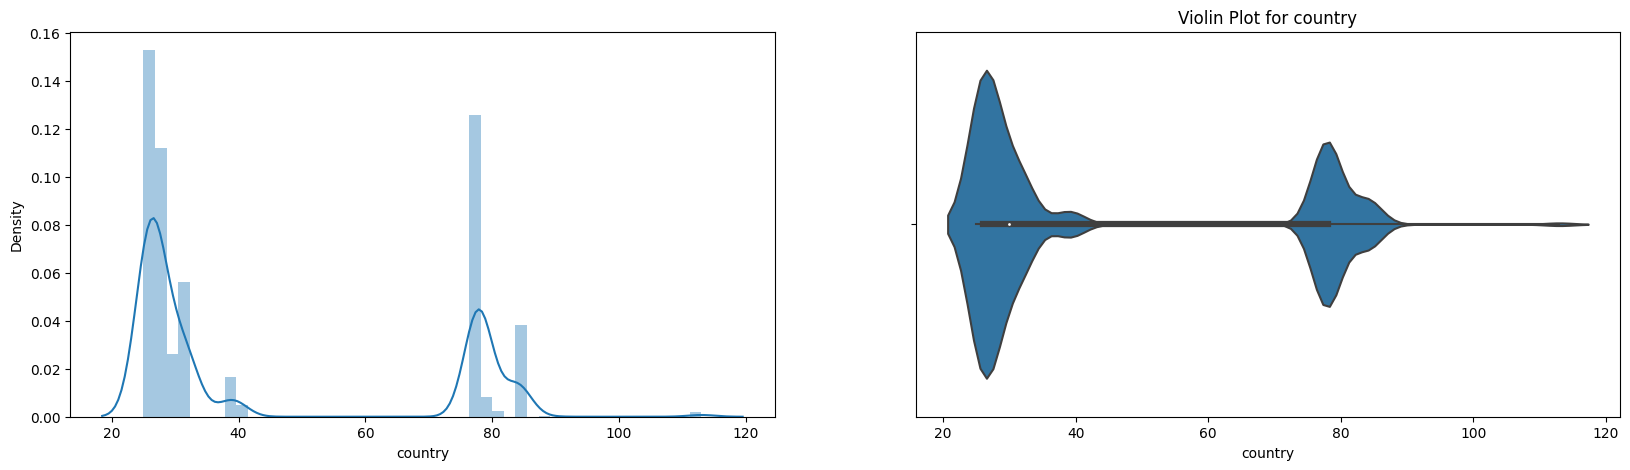

application
0.7245583983073829


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


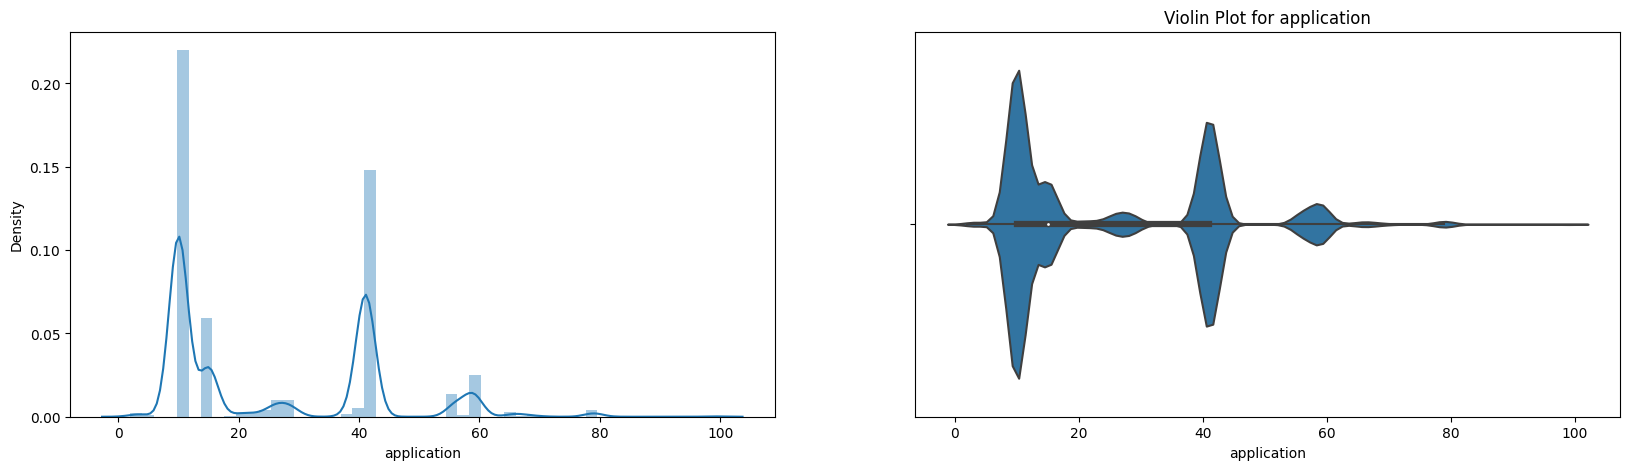

thickness
303.4450657126513


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


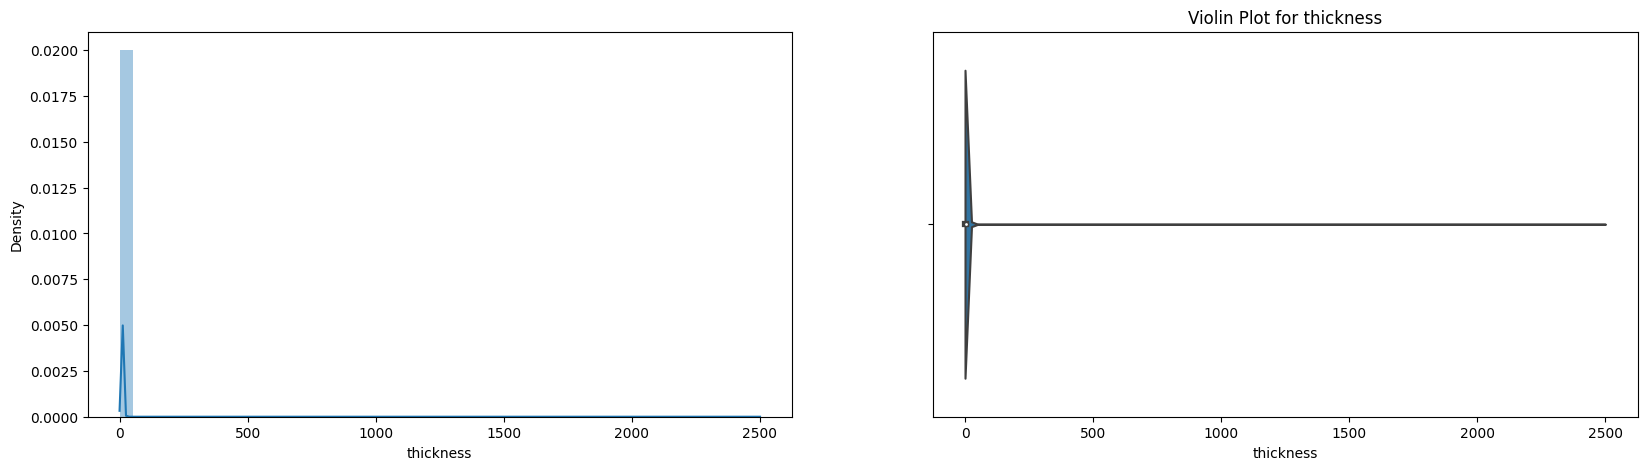

width
0.37459367901082125


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


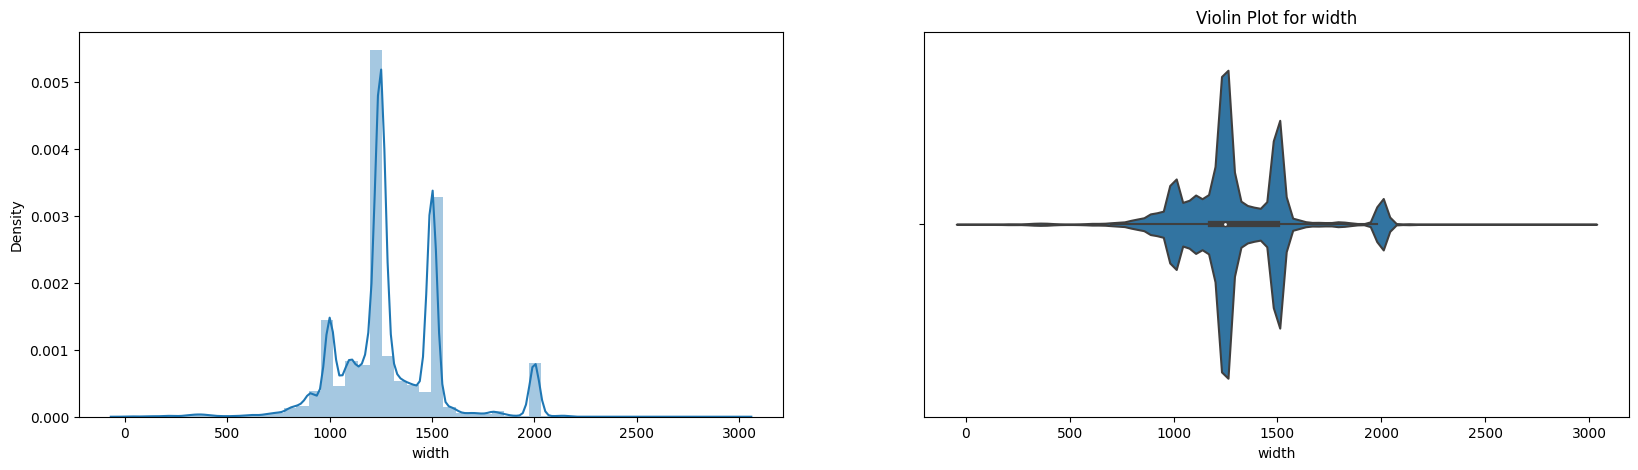

product_ref
1.0152071910463223


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


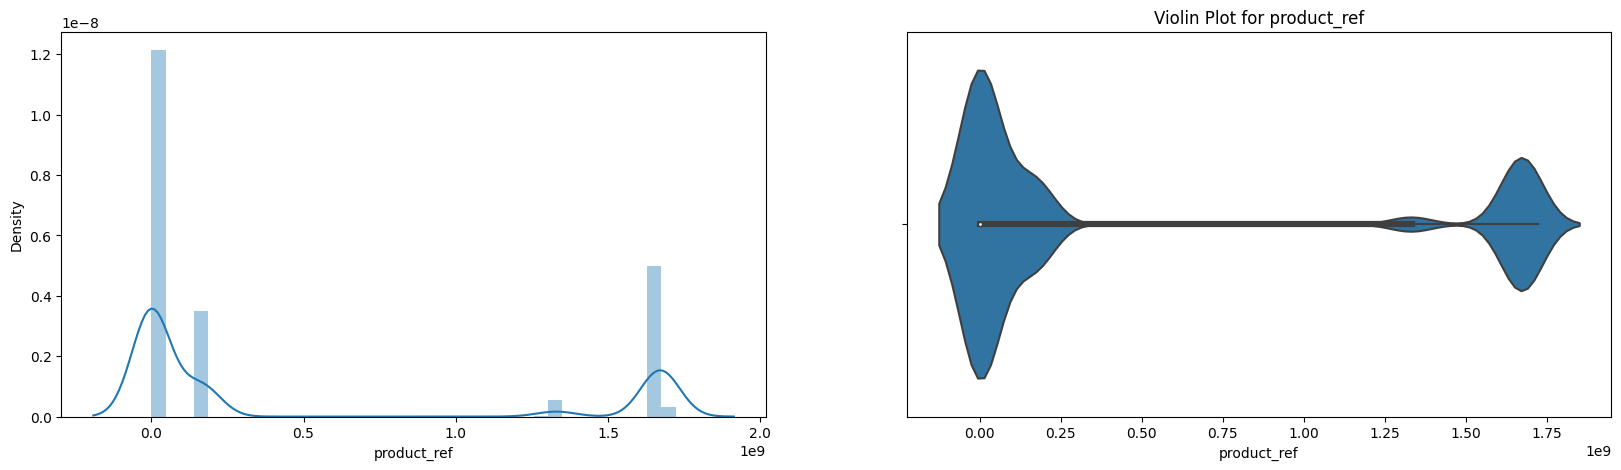

selling_price
301.38559971625915


<ipython-input-42-e4f85509df06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copper_num[col])


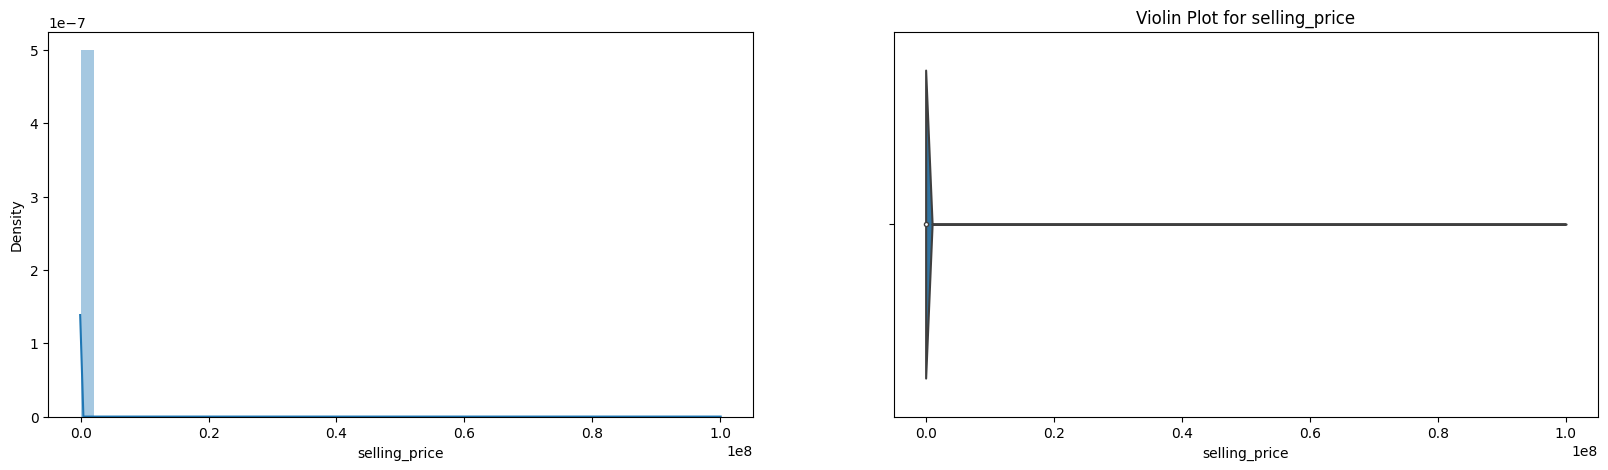

In [ ]:
for col in copper_num:
  print(col)
  print(skew(copper_num[col]))

  plt.figure(figsize = (20,5))
  plt.subplot(1,2,1)
  sns.distplot(copper_num[col])


  plt.subplot(1,2,2)
  sns.violinplot(data=copper_num, x=col)
  plt.title(f'Violin Plot for {col}')
  plt.show()

In [ ]:
df1['quantity tons_log'] = np.log(df1['quantity tons'])

<ipython-input-44-fc56e01b1474>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['quantity tons_log'])


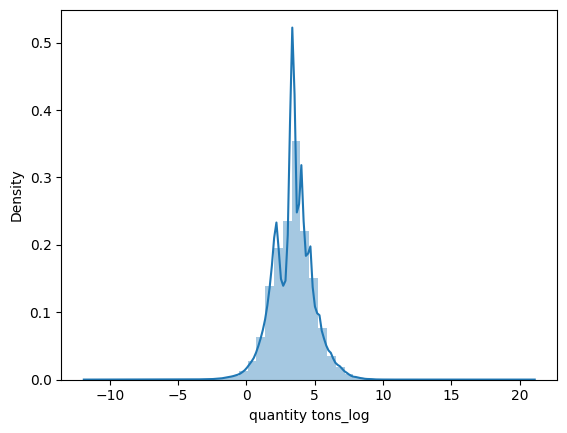

In [ ]:
sns.distplot(df1['quantity tons_log'])
plt.show()

In [ ]:
skew(df1['quantity tons_log'])

-0.06877660288098086

In [ ]:
df1['thickness_log'] = np.log(df['thickness'])

<ipython-input-47-8e4f0bf180f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['thickness_log'])


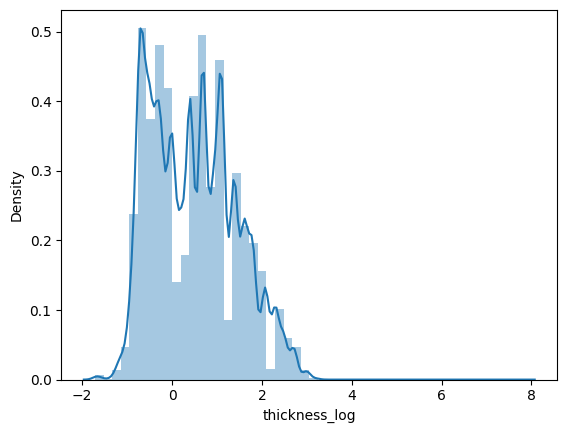

In [ ]:
sns.distplot(df1['thickness_log'])
plt.show()

In [ ]:
skew(df1['thickness_log'])

0.3514332759786154

In [ ]:
df1['selling_price_log'] = np.log(df['selling_price'])

<ipython-input-50-170bae09ca1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['selling_price_log'])


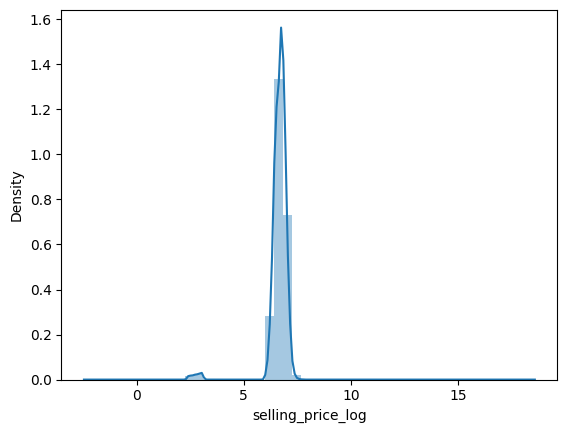

In [ ]:
sns.distplot(df1['selling_price_log'])
plt.show()

In [ ]:
skew(df1['selling_price'])

301.38559971625915

In [ ]:
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
quantity tons_log,181673.0,3.392111e+00,1.444849e+00,-11.512925,2.395316e+00,3.413291e+00,4.207084e+00,2.072327e+01
thickness_log,181673.0,4.803721e-01,9.337702e-01,-1.714798,-3.566749e-01,4.054651e-01,1.098612e+00,7.824046e+00


In [ ]:
df1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000
mean,5.874905e+03,3.051221e+07,44.890727,25.614406,2.564822,1295.286724,4.739679e+08,1.918076e+03,3.392111,0.480372,6.625890
std,2.349075e+06,2.433375e+07,24.403034,17.753421,6.572303,261.631754,7.175101e+08,3.317947e+05,1.444849,0.933770,0.565391
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01,-11.512925,-1.714798,-2.302585
25%,1.097167e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02,2.395316,-0.356675,6.505784
50%,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,3.413291,0.405465,6.699500
75%,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,4.207084,1.098612,6.859615
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08,20.723266,7.824046,18.420691


In [ ]:
#detect outlier using z-score
#detecting upper limit and lower limit
#Upper: Mean + 3 * standard deviation.
#Lower: Mean – 3 * standard deviation.


In [ ]:
df2 = df1.copy()

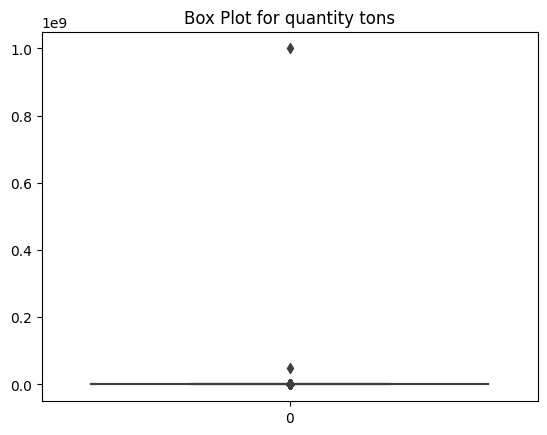

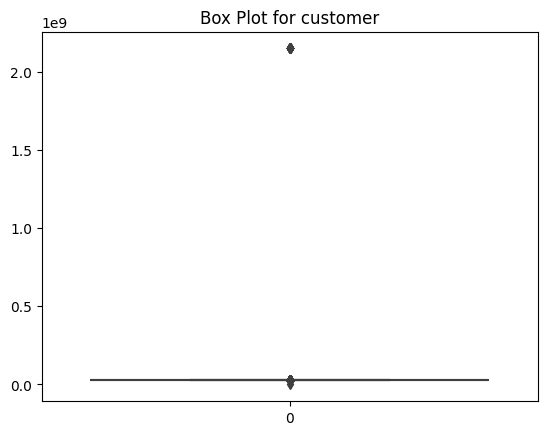

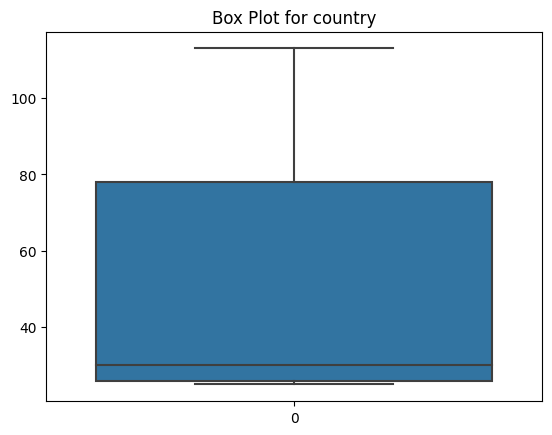

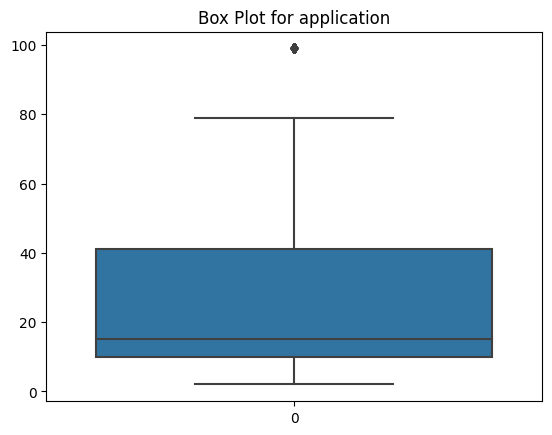

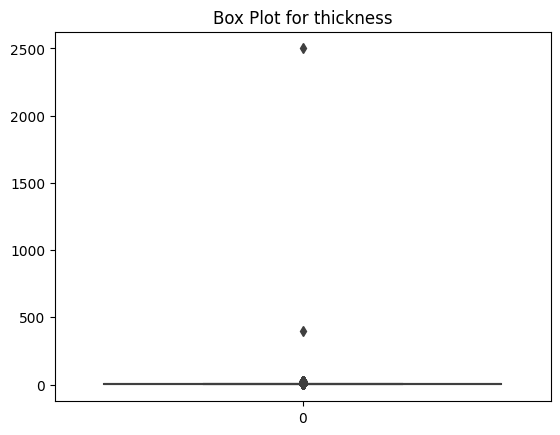

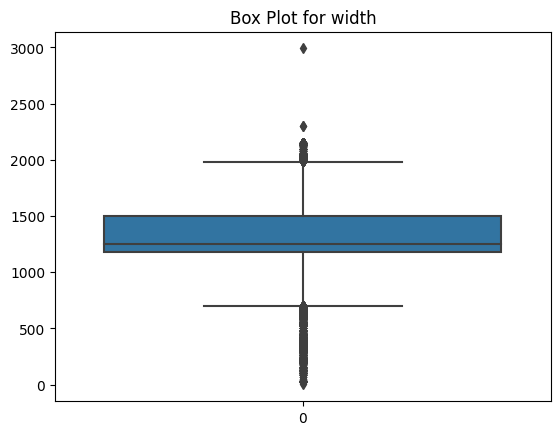

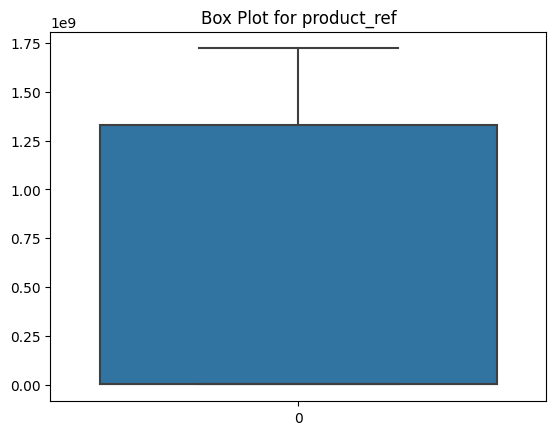

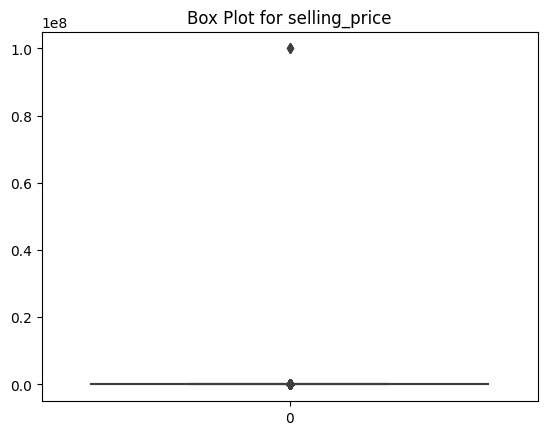

In [ ]:
#spotting outlier columns
for col in copper_num:
  sns.boxplot(copper_num[col])
  plt.title(f'Box Plot for {col}')
  plt.show()



In [ ]:
#handle outliers using clip method
def handle_outlier(df,column):
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
  outliers = df[column][((df2[column]<(lower_threshold)) | (df2[column]>(upper_threshold)))]
  print("Number of outliers before clip",len(outliers))
  print('Upper Threshold :',upper_threshold)
  print('Lower Threshold :',lower_threshold)
  df[column] = df[column].clip(lower_threshold, upper_threshold)
  outliers = df[column][((df2[column]<(lower_threshold)) | (df2[column]>(upper_threshold)))]
  print("Number of outliers after clip",len(outliers))


In [ ]:
handle_outlier(df2,'width')

Number of outliers before clip 10948
Upper Threshold : 1980.0
Lower Threshold : 700.0
Number of outliers after clip 0


In [ ]:
handle_outlier(df2,'selling_price_log')

Number of outliers before clip 3440
Upper Threshold : 7.390361168943161
Lower Threshold : 5.9750377948392694
Number of outliers after clip 0


In [ ]:
handle_outlier(df2,'thickness_log')

Number of outliers before clip 2
Upper Threshold : 3.281543137578373
Lower Threshold : -2.5396057928489957
Number of outliers after clip 0


In [ ]:
handle_outlier(df2,'quantity tons_log')

Number of outliers before clip 3662
Upper Threshold : 6.9247343237411325
Lower Threshold : -0.3223343794492468
Number of outliers after clip 0


In [ ]:
handle_outlier(df2,'application')

Number of outliers before clip 146
Upper Threshold : 87.5
Lower Threshold : -36.5
Number of outliers after clip 0


In [ ]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,1970-01-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01,3.991779,0.693147,6.749931
1,1970-01-01,30202938.0,25.0,Won,W,41.0,1210.0,DX51D+Z,1668701718,1970-01-01,6.643822,-0.223144,6.953684
2,1970-01-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,1970-01-01,5.956169,-0.967584,6.468211
3,1970-01-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,5.310301,0.832909,6.643790
4,1970-01-01,30211560.0,28.0,Won,W,10.0,1980.0,2_S275JR+AR-CL1,640665,1970-01-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,1970-01-01,30200854.0,25.0,Won,W,41.0,1220.0,DX51D+Z,164141591,1970-01-01,4.629691,-0.040822,6.381816
181669,1970-01-01,30200854.0,25.0,Won,W,41.0,1500.0,DX51D+Z,164141591,1970-01-01,5.337954,-0.051293,6.378426
181670,1970-01-01,30200854.0,25.0,Won,W,41.0,1250.0,DX51D+Z,164141591,1970-01-01,1.443523,-0.342490,6.428105
181671,1970-01-01,30200854.0,25.0,Won,W,41.0,1250.0,DX51D+Z,164141591,1970-01-01,3.413291,-0.162519,6.398595


In [ ]:
df3.skew()

<ipython-input-65-c8c86546f021>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.skew()


customer             86.985308
country               0.753835
application           0.707604
width                 0.667659
product_ref           1.015216
quantity tons_log    -0.026483
thickness_log         0.348279
selling_price_log    -0.272318
dtype: float64

<ipython-input-66-ee750aef949c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heatmap = df3.corr()


<Axes: >

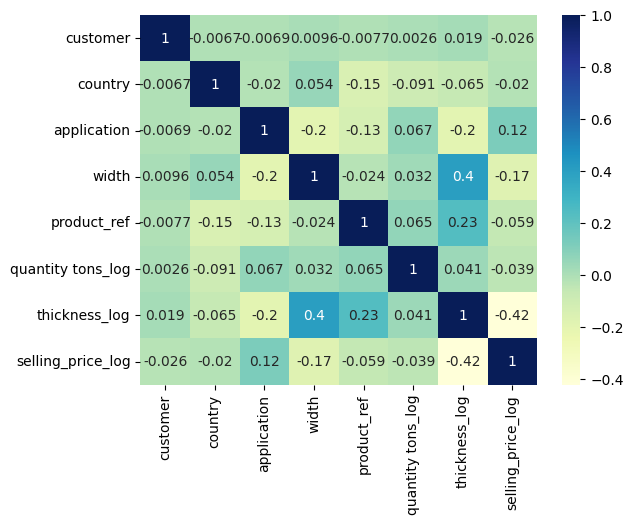

In [ ]:
df_heatmap = df3.corr()
sns.heatmap(df_heatmap, annot=True,cmap="YlGnBu")

In [ ]:
final_df = df3.copy()

In [ ]:
df3.to_csv("copper_final.csv")

## Predict **Status**

In [ ]:
#finind unique values
final_df['country'] = final_df['country'].astype(str)
country = final_df['country'].unique()
status = final_df['status'].unique()
item = final_df['item type'].unique()
print(country)
print(status)
print(item)

['28.0' '25.0' '30.0' '32.0' '38.0' '78.0' '27.0' '77.0' '113.0' '79.0'
 '26.0' '39.0' '40.0' '84.0' '80.0' '107.0' '89.0']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
#Encode the categorical column
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)


[ 5  2  6  7  8 12  4 11  1 13  3  9 10 15 14  0 16]
[7 0 6 1 2 8 5 4 3]
[5 6 3 1 2 0 4]


In [ ]:
for i, j in zip(status, transformed_status):
    print('before encoding :',i,'--- encoded :',j)

before encoding : Won --- encoded : 7
before encoding : Draft --- encoded : 0
before encoding : To be approved --- encoded : 6
before encoding : Lost --- encoded : 1
before encoding : Not lost for AM --- encoded : 2
before encoding : Wonderful --- encoded : 8
before encoding : Revised --- encoded : 5
before encoding : Offered --- encoded : 4
before encoding : Offerable --- encoded : 3


In [ ]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [ ]:
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

transformed_status = encode_status.transform(status)
transformed_status

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

In [ ]:
category_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in category_col:
    print(i)
    final_df[i] = encoder.fit_transform(final_df[i])
    print(final_df[i].unique())

status
[7 0 6 1 2 8 5 4 3]
item type
[5 6 3 1 2 0 4]
country
[ 5  2  6  7  8 12  4 11  1 13  3  9 10 15 14  0 16]


In [ ]:
final_df

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,1970-01-01,30156308.0,5,7,5,10.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01,3.991779,0.693147,6.749931
1,1970-01-01,30202938.0,2,7,5,41.0,1210.0,DX51D+Z,1668701718,1970-01-01,6.643822,-0.223144,6.953684
2,1970-01-01,30153963.0,6,7,6,28.0,952.0,S0380700,628377,1970-01-01,5.956169,-0.967584,6.468211
3,1970-01-01,30349574.0,7,7,3,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,5.310301,0.832909,6.643790
4,1970-01-01,30211560.0,5,7,5,10.0,1980.0,2_S275JR+AR-CL1,640665,1970-01-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,1970-01-01,30200854.0,2,7,5,41.0,1220.0,DX51D+Z,164141591,1970-01-01,4.629691,-0.040822,6.381816
181669,1970-01-01,30200854.0,2,7,5,41.0,1500.0,DX51D+Z,164141591,1970-01-01,5.337954,-0.051293,6.378426
181670,1970-01-01,30200854.0,2,7,5,41.0,1250.0,DX51D+Z,164141591,1970-01-01,1.443523,-0.342490,6.428105
181671,1970-01-01,30200854.0,2,7,5,41.0,1250.0,DX51D+Z,164141591,1970-01-01,3.413291,-0.162519,6.398595


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#seperate the dependent variable(target) and independent columns(features)
x = final_df[['quantity tons_log','thickness_log','selling_price_log','customer','country','item type','application','width','product_ref']].values
y = final_df['status']

In [ ]:
scaler_classify = StandardScaler().fit(x)
x = scaler_classify.transform(x)

In [ ]:
#split the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [91]:
#RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_preds = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_preds)
rf_classification_rep = classification_report(y_test, rf_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
#DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_preds = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_preds)
dt_classification_rep = classification_report(y_test, dt_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
#Xgb classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
xgb_preds = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test,xgb_preds)
xgb_classification_rep = classification_report(y_test, xgb_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
models = ['RandomForestClassifier', 'XGBClassifier', 'DecisionTreeClassifier']

In [95]:
score = [rf_accuracy, xgb_accuracy, dt_accuracy]

In [96]:
classification_report = [rf_classification_rep,dt_classification_rep,xgb_classification_rep]

In [97]:
print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value , class_report in zip(models, score,classification_report):
    print(model, score_value,class_report)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.8658030897948699               precision    recall  f1-score   support

           0       1.00      1.00      1.00       951
           1       0.82      0.81      0.81     10428
           2       0.77      0.70      0.73      5910
           3       0.00      0.00      0.00         1
           4       0.67      0.22      0.33        18
           5       0.56      0.38      0.45      1335
           6       0.78      0.70      0.73      1224
           7       0.90      0.93      0.92     34634
           8       0.00      0.00      0.00         1

    accuracy                           0.87     54502
   macro avg       0.61      0.53      0.55     54502
weighted avg       0.86      0.87      0.86     54502

XGBClassifier 0.8068878206304356               precision    recall  f1-score   support

           0       1.00      1.00      1.00       951
           1       0.77      0.77      0.77     10428

# Selling price **prediction**

In [98]:
df_regress = final_df.copy()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [100]:
x=df_regress[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_regress['selling_price_log']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [104]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((163505, 9), (18168, 9), (163505,), (18168,))

In [106]:
linear_regression = LinearRegression()

In [108]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [109]:
y_pred = linear_regression.predict(x_test)

In [111]:
# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [112]:
# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.052535059489677044
R-squared (R2) Score: 0.18428392382678127


In [117]:
# Create a Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor()

# Train the regressor on the training data
decision_tree_regressor.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred = decision_tree_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.030206933347133386
R-squared (R2) Score: 0.5309745266779163


In [118]:
# Create a Random Forest Regressor with specified parameters
random_forest_regressor = RandomForestRegressor()

# Train the model on the training data
random_forest_regressor.fit(x_train, y_train)

# Predict the target variable for the x values
y_pred = random_forest_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.01821003876198821
R-squared (R2) Score: 0.7172512697199849


In [121]:
# Create a Bayesian Ridge Regression model
bayesian_regression = BayesianRidge()

# Train the model on the training data
bayesian_regression.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred = bayesian_regression.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.05253487215338772
R-squared (R2) Score: 0.18428683261234924


In [122]:
pickle.dump(linear_regression , open('linear-regression-model.pk1' , 'wb'))
pickle.dump(decision_tree_regressor , open('decision-tree-model.pk1' , 'wb'))
pickle.dump(random_forest_regressor , open('random-forest-model.pk1' , 'wb'))
pickle.dump(bayesian_regression , open('bayesian-regression-model.pk1' , 'wb'))